<a href="https://colab.research.google.com/github/its-sbal/basic-perceptron-using-TF.keras/blob/main/p1_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
nfs = 2
nu = 1

In [ ]:
weight = tf.Variable(tf.zeros([nfs,nu])) 
bias=tf.Variable(tf.zeros([nu]))

In [ ]:
def perceptron(x):
   I = tf.add(tf.matmul(x, weight), bias)
   return tf.sigmoid(I)

In [ ]:
individual_loss = lambda: abs(tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=perceptron(x))))
optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01)

In [ ]:
url = https://github.com/Apress/Deep-Learning-Projects-Using-TensorFlow-2/archive/refs/heads/master.zip

In [ ]:
import zipfile
import os

In [ ]:
!wget --no-check-certificate \
    "https://github.com/Apress/Deep-Learning-Projects-Using-TensorFlow-2/archive/refs/heads/master.zip" \
    -O "/tmp/Apress.zip"


zip_ref = zipfile.ZipFile('/tmp/Apress.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

--2022-01-30 15:35:51--  https://github.com/Apress/Deep-Learning-Projects-Using-TensorFlow-2/archive/refs/heads/master.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Apress/Deep-Learning-Projects-Using-TensorFlow-2/zip/refs/heads/master [following]
--2022-01-30 15:35:51--  https://codeload.github.com/Apress/Deep-Learning-Projects-Using-TensorFlow-2/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 192.30.255.120
Connecting to codeload.github.com (codeload.github.com)|192.30.255.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/Apress.zip’

/tmp/Apress.zip         [ <=>                ]  47.99K  --.-KB/s    in 0.01s   

2022-01-30 15:35:51 (4.02 MB/s) - ‘/tmp/Apress.zip’ saved [49144]



In [ ]:
df = pd.read_csv('/tmp/Deep-Learning-Projects-Using-TensorFlow-2-master/perceptron-data.csv')

In [ ]:
df.head()

,label,x1,x2
0,1,2.6487,4.5192
1,1,1.5438,2.4443
2,1,1.8990,4.2409
3,1,2.4711,5.8097
4,1,3.3590,6.4423


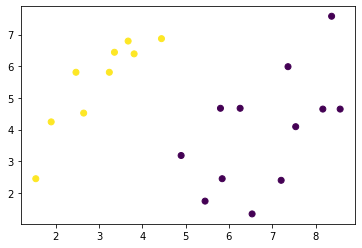

In [ ]:
plt.scatter(df.x1,df.x2,c=df.label)

In [ ]:
x_input = df[['x1','x2']].values
y_label = df[['label']].values

In [ ]:
x=tf.Variable(x_input)
x=tf.cast(x,tf.float32)
y=tf.Variable(y_label)
y=tf.cast(y,tf.float32)

In [ ]:
for i in range(1000):
  optimizer.minimize(individual_loss,[weight,bias])

In [ ]:
tf.print(weight,bias)

[[-2.42329383]
 [1.85045433]] [1.74988687]


In [ ]:
ypred=perceptron(x)

In [ ]:
ypred=tf.round(ypred)

In [ ]:
accuracy_score(y, ypred)

1.0

In [ ]:
confusion_matrix(y, ypred)

array([[12,  0],
       [ 0,  9]])